In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def objective_function(x: np.ndarray) -> float:
    """
    Objective function to be minimized.
    Example: Rastrigin function.
    
    Parameters:
    x : array-like
        Input array for the objective function.
    
    Returns:
    float
        The calculated value of the objective function.
    """
    return np.sum(x**2 - 10 * np.cos(2 * np.pi * x) + 10)

In [3]:
def initialize_fireflies(number_of_fireflies, dimension, lower_bound, upper_bound):
    """
    Initialize the population of fireflies within the given bounds.
    
    Parameters:
    number_of_fireflies : int
        Number of fireflies.
    dim : int
        Dimension of the problem.
    lower_bound : float
        Lower bound of the search space.
    upper_bound : float
        Upper bound of the search space.
    
    Returns:
    ndarray
        Initialized population of fireflies.
    """
    return lower_bound + (upper_bound - lower_bound) * np.random.rand(number_of_fireflies, dimension)

In [4]:
def update_firefly_position(firefly_i, firefly_j, beta_o, gamma, alpha, lower_bound, upper_bound):
    """
    Update the position of firefly_i based on its attraction to firefly_j.
    
    Parameters:
    firefly_i : array-like
        Position of firefly_i.
    firefly_j : array-like
        Position of firefly_j.
    beta_o : float
        Minimum value of the attractiveness.
    gamma : float
        Absorption coefficient.
    alpha : float
        Randomization parameter.
    lower_bound : float
        Lower bound of the search space.
    upper_bound : float
        Upper bound of the search space.
    
    Returns:
    ndarray
        Updated position of firefly_i.
    """
    distance = np.linalg.norm(firefly_i - firefly_j)

    beta = beta_o * np.exp(-gamma * distance**2)

    random_factor = alpha * (np.random.rand(*firefly_i.shape) - 0.5)
    
    new_position = firefly_i + beta * (firefly_j - firefly_i) + random_factor
    new_position = np.clip(new_position, lower_bound, upper_bound)

    return new_position

In [10]:
def firefly_algorithm(number_of_fireflies, dimension, lower_bound, upper_bound, maximum_iterations, beta_min=1, gamma=1, alpha=0.2):
    """
    Firefly Algorithm for optimization.
    
    Parameters:
    number_of_fireflies : int
        Number of fireflies.
    dimension : int
        Dimension of the problem.
    lower_bound : float
        Lower bound of the search space.
    upper_bound : float
        Upper bound of the search space.
    max_iter : int
        Maximum number of iterations.
    beta_min : float, optional
        Minimum value of the attractiveness. Default is 1.
    gamma : float, optional
        Absorption coefficient. Default is 1.
    alpha : float, optional
        Randomization parameter. Default is 0.2.
    
    Returns:
    tuple
        Best solution found and its objective function value.
    """
    fireflies = initialize_fireflies(number_of_fireflies, dimension, lower_bound, upper_bound)
    fitness = np.apply_along_axis(objective_function, 1, fireflies)

    best_fitness_history = [np.min(fitness)]
    
    for t in range(maximum_iterations):
        for i in range(number_of_fireflies):
            for j in range(number_of_fireflies):
                if fitness[i] > fitness[j]:
                    fireflies[i] = update_firefly_position(fireflies[i], fireflies[j], beta_min, gamma, alpha, lower_bound, upper_bound)
                    fitness[i] = objective_function(fireflies[i])

        best_fitness_history.append(np.min(fitness))
    
    best_firefly = fireflies[np.argmin(fitness)]
    best_fitness = np.min(fitness)
    
    return best_firefly, best_fitness, best_fitness_history

In [33]:
number_of_fireflies = 100
dimension = 10
maximum_iterations = 1000
alpha = 0.75
lower_bound = -5.12
upper_bound = 5.12

In [34]:
best_solution, best_value, fitness_history = firefly_algorithm(number_of_fireflies, dimension, lower_bound, upper_bound, maximum_iterations, alpha=alpha)
print("Best solution found:", best_solution)
print("Value of the best solution:", best_value)

Best solution found: [ 2.05072345 -1.01389302  1.80712537 -0.06572744  0.07555402 -0.29275036
 -0.03423284 -0.00614844  2.81193031  0.0677207 ]
Value of the best solution: 45.47279139930767


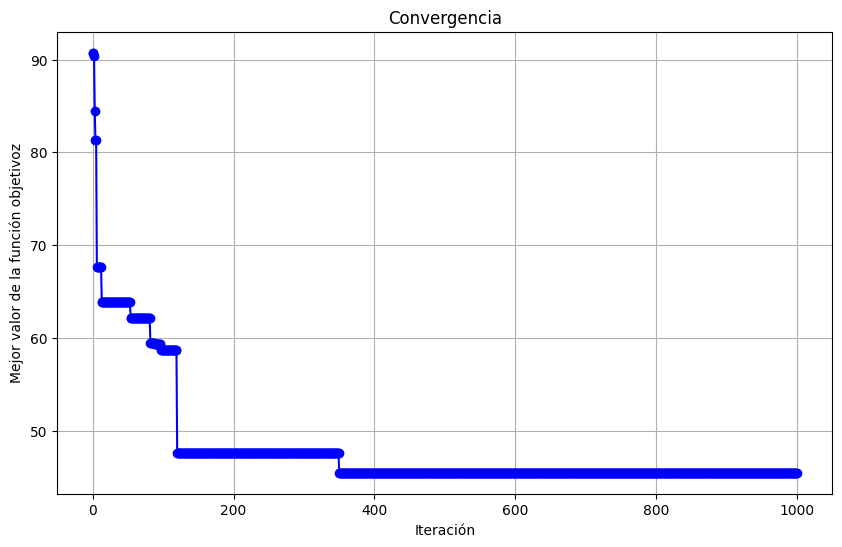

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(fitness_history, marker='o', linestyle='-', color='b')
plt.title("Convergencia")
plt.xlabel("Iteración")
plt.ylabel("Mejor valor de la función objetivoz")
plt.grid(True)
plt.show()